## GreyWolf Optimizer

In [65]:
!pip install numpy
!pip install matplotlib

In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
class wolf:
    
    def __init__(self, dim):
        self.position = 100 * np.random.rand(dim)
        self.obj_score = float('inf')

In [4]:
def GWO(obj_fun, soln_dim, wolves_n, iter_n):
    
    # obj_fun   - objective function to be minimized
    # soln_dim  - dimension of solution vector
    # wolves_n  - no. of searching wolves
    # iter_n    - no of iterations
    
    wolves = []
    
    # 1] Initialize positions of wolves randomly
    
    for i in range(wolves_n):
        w = wolf(soln_dim)
        #print(w.position)
        wolves.append(w)
    
    alpha , beta, delta = wolves[:3]
    
    score_history = {
        'alpha' : [],
        'beta' : [],
        'delta' : []
    }
    
    # 2] Loop 3-4  iter_n times
    
    for i in range(iter_n):
        
    #   3] Calculate objective function for all wolves and find best 3 alpha, beta & gamma
        
        for w in wolves:
            w.obj_score = obj_fun(w.position)
            
            if w.obj_score <= alpha.obj_score:
                delta = beta
                beta = alpha
                alpha = w
            
            elif w.obj_score <= beta.obj_score:
                delta = beta
                beta = w
                
            elif w.obj_score <= delta.obj_score:
                delta = w
                
        score_history['alpha'].append(alpha.obj_score)
        score_history['beta'].append(beta.obj_score)
        score_history['delta'].append(delta.obj_score)
        
        
    #   4] Update positions of rest of wolves based on GWO mathematical formula
    
        # a decreases linearly from 2 to 0 as iteration proceeds
        a = 2 * (1 - (i/iter_n))
        
        for w in wolves:
            
            # r1 & r2 are random vectors in [0, 1]
            r1 = np.random.rand(soln_dim)
            r2 = np.random.rand(soln_dim)
            
            A1 = a * ((2 * r1) - 1)
            C1 = 2 * r2
            
            D_alpha = abs((C1 * alpha.position) - w.position) 
            X1 = alpha.position - (A1 * D_alpha)
            
            
            r1 = np.random.rand(soln_dim)
            r2 = np.random.rand(soln_dim)
            
            A2 = a * ((2 * r1) - 1)
            C2 = 2 * r2

            D_beta = abs((C2 * beta.position) - w.position) 
            X2 = beta.position - (A2 * D_beta)
            
            
            r1 = np.random.rand(soln_dim)
            r2 = np.random.rand(soln_dim)
            
            A3 = a * ((2 * r1) - 1)
            C3 = 2 * r2

            D_delta = abs((C3 * delta.position) - w.position) 
            X3 = delta.position - (A3 * D_delta)
            
            w.position = (X1 + X2 + X3)/3
    
    # 5] Return best solution (alpha)
    
    return alpha, score_history
    

In [5]:
def dummy_obj_fun(sol):
    return sum(sol*sol)

In [15]:
soln_dim = 3
wolves_n = 150
iter_n = 10

best, history = GWO(dummy_obj_fun, soln_dim=soln_dim, wolves_n=wolves_n, iter_n=iter_n)
best.position

array([-3.68987639e-05,  1.84974228e-04,  3.37788019e-04])

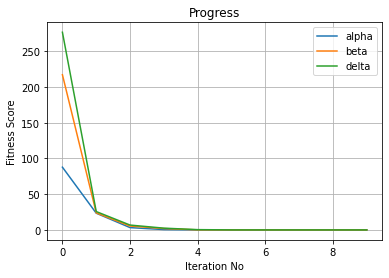

In [16]:
plt.plot(np.array(history['alpha']) ,label='alpha')
plt.plot(np.array(history['beta']), label='beta')
plt.plot(np.array(history['delta']), label='delta')
plt.xlabel("Iteration No")
plt.ylabel("Fitness Score")
plt.title('Progress')
plt.grid()
plt.legend()
plt.savefig("graph")

In [17]:
print(history['alpha'])
print(history['beta'])
print(history['delta'])

[87.74442734164452, 23.397306594807066, 3.2335240625188124, 0.5012183489827489, 0.06500977079342869, 0.017754978590692222, 0.0031355198765169656, 3.3276893984678424e-05, 4.694388565790032e-06, 2.723885183828924e-07]
[217.05450581531719, 23.819329169207947, 5.388540891490693, 1.9230078190781792, 0.0993353267686046, 0.019920295184303854, 0.003277329129977312, 0.0001497491807366053, 9.269747695891768e-06, 6.181186643734202e-07]
[276.45829393630754, 25.661886805881903, 6.778956305007788, 2.464989970474093, 0.3896419133645417, 0.020277860181780575, 0.0033359157386731097, 0.00016502192837053654, 1.7173148408796357e-05, 7.72185319994031e-07]
